In [1]:
import numpy as np
import pandas as pd
import keras
import cv2 as cv
from keras.layers import LSTM, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import os
import cv2

In [2]:
train_path = 'C:/Users/amitg/Portfolio_Projects/Areca_Nut_Disease_Prediction/Arecanut_dataset/train'
test_path = 'C:/Users/amitg/Portfolio_Projects/Areca_Nut_Disease_Prediction/Arecanut_dataset/test'

print("type of Images in Train dataset"+str(os.listdir(train_path)))
print("type of Images in Test dataset"+str(os.listdir(test_path)))

type of Images in Train dataset['bud borer', 'healthy_foot', 'Healthy_Leaf', 'Healthy_Nut', 'Healthy_Trunk', 'Mahali_Koleroga', 'stem cracking', 'Stem_bleeding', 'yellow leaf disease']
type of Images in Test dataset['bud borer', 'healthy_foot', 'Healthy_Leaf', 'Healthy_Nut', 'Healthy_Trunk', 'Mahali_Koleroga', 'stem cracking', 'Stem_bleeding', 'yellow leaf disease']


bud borer images:


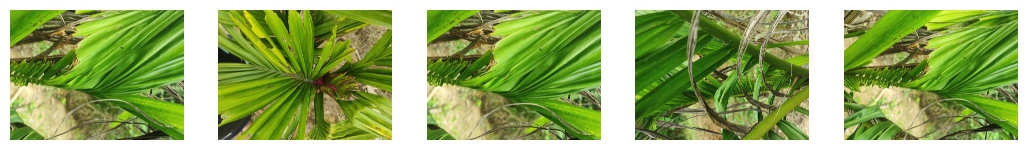

healthy_foot images:


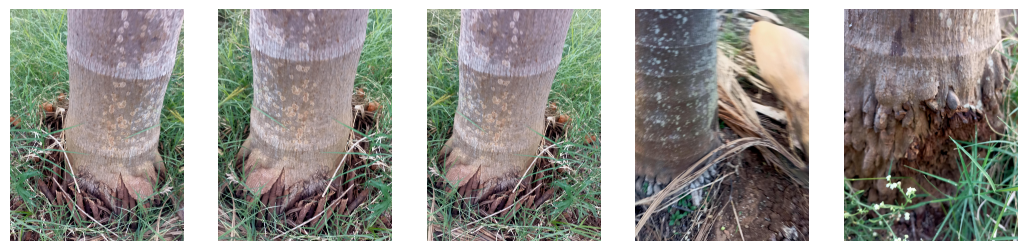

Healthy_Leaf images:


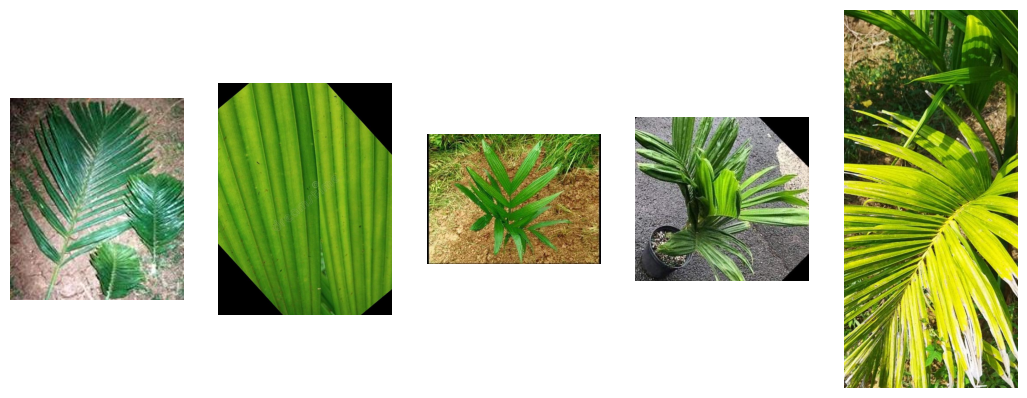

Healthy_Nut images:


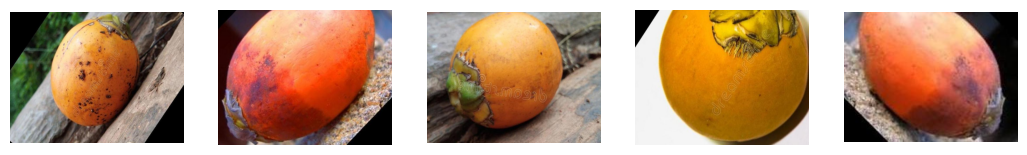

Healthy_Trunk images:


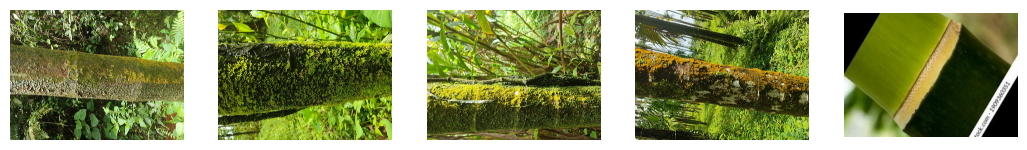

Mahali_Koleroga images:


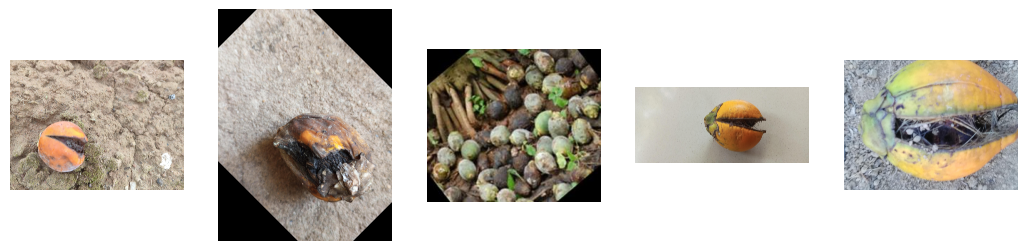

stem cracking images:


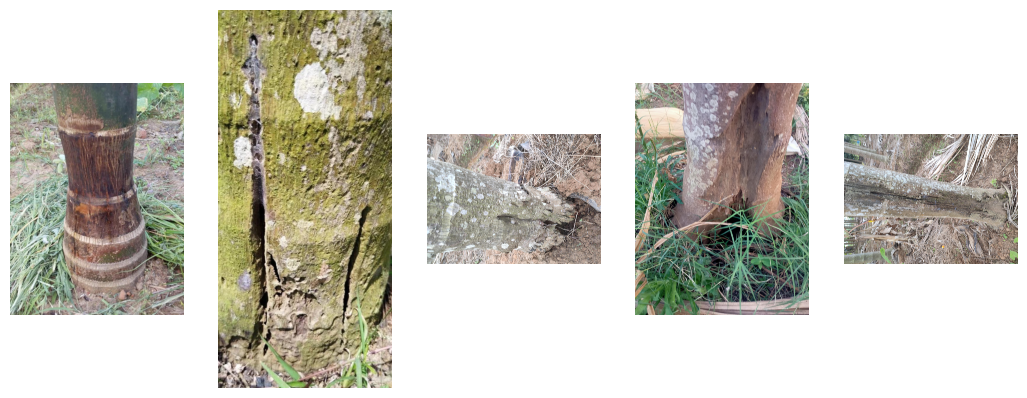

Stem_bleeding images:


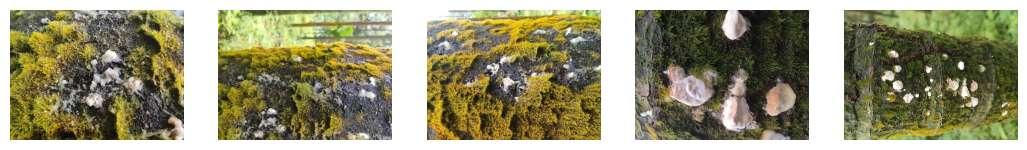

yellow leaf disease images:


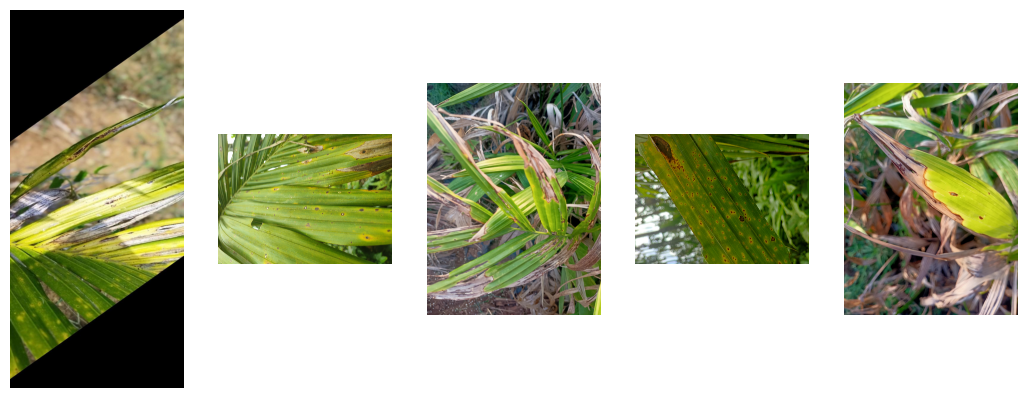

In [4]:
import matplotlib.pyplot as plt
rows, cols = (1, 5)

for category in os.listdir(train_path):
    print(f'{category} images:')
    category_path = os.path.join(train_path, category)
    
    fig = plt.figure(figsize=(13, 8))
    for i in range(rows * cols):
        fig.add_subplot(rows, cols, i + 1)
        
        # List image files in the specific category's directory
        image_files = os.listdir(category_path)
        if not image_files:
            continue
        
        # Select a random image file from the list
        random_image_id = np.random.choice(image_files)
        image = cv.imread(os.path.join(category_path, random_image_id))
        
        plt.imshow(image[:, :, ::-1])  # Convert BGR to RGB
        #plt.title(random_image_id)
        plt.axis('off')
    
    plt.show()

In [5]:
from tqdm import tqdm
class_names = ['stem cracking', 'Stem_bleeding', 'Healthy_Leaf', 'yellow leaf disease', 'healthy_foot', 'Healthy_Trunk', 'Mahali_Koleroga', 'bud borer', 'Healthy_Nut']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [6]:
def load_data():
    
    
    datasets = ['C:/Users/amitg/Portfolio_Projects/Areca_Nut_Disease_Prediction/Arecanut_dataset/train', 'C:/Users/amitg/Portfolio_Projects/Areca_Nut_Disease_Prediction/Arecanut_dataset/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                #image = cv2.cvtColor(image, cv2.COLOR_RGB2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [7]:
(x_train, y_train), (x_test, y_test) = load_data()

Loading C:/Users/amitg/Portfolio_Projects/Areca_Nut_Disease_Prediction/Arecanut_dataset/train


100%|███████████████████████████████████████████████████████████████████████████████████████████| 1477/1477 [02:53<00:00,  8.53it/s]


Loading C:/Users/amitg/Portfolio_Projects/Areca_Nut_Disease_Prediction/Arecanut_dataset/test


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 370/370 [00:43<00:00,  8.46it/s]


In [8]:
# Define increased batch size and epochs
batch_size = 128  # Increased batch size
epochs = 50  # Further increased number of epochs
data_augmentation = False
num_classes = 10

In [9]:
# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

x_train shape: (8847, 150, 150, 3)
8847 train samples
2216 test samples
y_train shape: (8847,)


In [11]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(num_classes, activation='softmax'))  # Output layer

In [18]:
# Compile the model with specified learning rate
learning_rate = 0.001  # Adjust learning rate as needed
opt = Adam(learning_rate=learning_rate, clipnorm=1.0)  # Apply gradient clipping
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [20]:
# Define callbacks for early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

In [21]:
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[early_stop, reduce_lr])

Epoch 1/50
70/70 [==============================] - 159s 2s/step - loss: 1.1895 - accuracy: 0.6091 - val_loss: 0.6760 - val_accuracy: 0.7739 - lr: 0.0010
Epoch 2/50
70/70 [==============================] - 163s 2s/step - loss: 0.6023 - accuracy: 0.7829 - val_loss: 0.4740 - val_accuracy: 0.8272 - lr: 0.0010
Epoch 3/50
70/70 [==============================] - 160s 2s/step - loss: 0.3906 - accuracy: 0.8657 - val_loss: 0.4166 - val_accuracy: 0.8588 - lr: 0.0010
Epoch 4/50
70/70 [==============================] - 154s 2s/step - loss: 0.2854 - accuracy: 0.9001 - val_loss: 0.2514 - val_accuracy: 0.9138 - lr: 0.0010
Epoch 5/50
70/70 [==============================] - 155s 2s/step - loss: 0.2264 - accuracy: 0.9216 - val_loss: 0.2062 - val_accuracy: 0.9228 - lr: 0.0010
Epoch 6/50
70/70 [==============================] - 153s 2s/step - loss: 0.1509 - accuracy: 0.9495 - val_loss: 0.1886 - val_accuracy: 0.9341 - lr: 0.0010
Epoch 7/50
70/70 [==============================] - 153s 2s/step - loss: 0.1

In [22]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

70/70 [==============================] - 8s 116ms/step - loss: 0.1257 - accuracy: 0.9634
Test loss: 0.12567375600337982
Test accuracy: 0.963447630405426


1/1 [==============================] - 0s 450ms/step


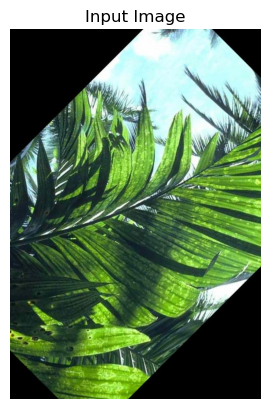

Predicted Disease:  yellow leaf disease
Class Probabilities:  [[1.3747173e-06 1.8269024e-07 9.7052066e-04 9.9738699e-01 7.5791306e-08
  1.6402656e-03 2.3614470e-07 3.9102167e-07 3.8494974e-08 5.2364558e-13]]


In [23]:
image_path = 'C:/Users/amitg/PycharmProjects/Project_work_final/final_testing/yellow leaf disease/yellow leaf disease_original_94.jpg_3ee0a073-182a-46e9-b911-ba7606749785.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (150, 150))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

predictions = model.predict(image)

predicted_class = np.argmax(predictions)

class_names = ['stem cracking', 'Stem_bleeding', 'Healthy_Leaf', 'yellow leaf disease', 'healthy_foot', 'Healthy_Trunk', 'Mahali_Koleroga', 'bud borer', 'Healthy_Nut']
predicted_disease = class_names[predicted_class]

plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title("Input Image")
plt.axis('off')
plt.show()

highlighted_disease = f"\033[1m{predicted_disease}\033[0m"  # Use ANSI escape codes for highlighting (bold)

print("Predicted Disease: ", highlighted_disease)
print("Class Probabilities: ", predictions)

In [24]:
from sklearn.metrics import confusion_matrix

def calculate_metrics(model, X_train, y_train, X_test, y_test):
    # Predictions on training and test datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Convert predicted probabilities to binary predictions (0 or 1)
    y_train_pred_binary = np.argmax(y_train_pred, axis=1)
    y_test_pred_binary = np.argmax(y_test_pred, axis=1)
    y_train_binary = np.argmax(y_train, axis=1)
    y_test_binary = np.argmax(y_test, axis=1)
    train_confusion_matrix = confusion_matrix(y_train_binary, y_train_pred_binary)
    test_confusion_matrix = confusion_matrix(y_test_binary, y_test_pred_binary)



    # Extract TP, TN, FP, FN values from confusion matrices
    train_tp = train_confusion_matrix[1, 1]
    train_tn = train_confusion_matrix[0, 0]
    train_fp = train_confusion_matrix[0, 1]
    train_fn = train_confusion_matrix[1, 0]

    test_tp = test_confusion_matrix[1, 1]
    test_tn = test_confusion_matrix[0, 0]
    test_fp = test_confusion_matrix[0, 1]
    test_fn = test_confusion_matrix[1, 0]

    # Calculate ratios
    train_false_positive_rate = train_fp / (train_fp + train_tn)
    train_false_negative_rate = train_fn / (train_fn + train_tp)
    train_true_positive_rate = train_tp / (train_tp + train_fn)
    train_true_negative_rate = train_tn / (train_tn + train_fp)

    test_false_positive_rate = test_fp / (test_fp + test_tn)
    test_false_negative_rate = test_fn / (test_fn + test_tp)
    test_true_positive_rate = test_tp / (test_tp + test_fn)
    test_true_negative_rate = test_tn / (test_tn + test_fp)

    return {
        "Train False Positive Rate": train_false_positive_rate,
        "Train False Negative Rate": train_false_negative_rate,
        "Train True Positive Rate": train_true_positive_rate,
        "Train True Negative Rate": train_true_negative_rate,
        "Test False Positive Rate": test_false_positive_rate,
        "Test False Negative Rate": test_false_negative_rate,
        "Test True Positive Rate": test_true_positive_rate,
        "Test True Negative Rate": test_true_negative_rate,
    }

# Example usage:
metrics = calculate_metrics(model, x_train, y_train, x_test, y_test)
print(metrics)

70/70 [==============================] - 10s 144ms/step
{'Train False Positive Rate': 0.0, 'Train False Negative Rate': 0.0, 'Train True Positive Rate': 1.0, 'Train True Negative Rate': 1.0, 'Test False Positive Rate': 0.0, 'Test False Negative Rate': 0.02702702702702703, 'Test True Positive Rate': 0.972972972972973, 'Test True Negative Rate': 1.0}


In [25]:
model.save('areca_rnn_model_3')

INFO:tensorflow:Assets written to: areca_rnn_model_3\assets


INFO:tensorflow:Assets written to: areca_rnn_model_3\assets
